# Proyek Analisis Data: PRSA_Data_Wanliu_20130301-20170228
- **Nama:** Hilmiyatul Asna
- **Email:** hilmiyatulasna4@gmail.com
- **ID Dicoding:** hilmiyatul_asna_pCB5

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 Pada bulan apa rata-rata konsentrasi PM2.5 dalam udara mencapai nilai tertingginya di tahun 2016?
- Pertanyaan 2 Di jam berapakah rata-rata jumlah PM2.5 di udara tinggi?
- Pertanyaan 3 Faktor apa saja yang mempengaruhi atau berkorelasi kuat dengan konsentrasi PM2.5?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
prsa_wanliu_df = pd.read_csv("./data/PRSA_Data_Wanliu_20130301-20170228.csv")
prsa_wanliu_df.head(15)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu
5,6,2013,3,1,5,3.0,6.0,8.0,17.0,300.0,54.0,-2.2,1025.6,-19.6,0.0,N,3.7,Wanliu
6,7,2013,3,1,6,3.0,3.0,10.0,21.0,300.0,52.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Wanliu
7,8,2013,3,1,7,3.0,6.0,11.0,26.0,300.0,47.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Wanliu
8,9,2013,3,1,8,7.0,10.0,14.0,39.0,400.0,36.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Wanliu
9,10,2013,3,1,9,3.0,9.0,12.0,31.0,400.0,46.0,1.2,1028.5,-19.3,0.0,N,2.6,Wanliu


**Insight:**
- Peningkatan polusi: PM2.5 dan PM10 naik signifikan setelah jam 4 pagi, dari 3.0 ke 10.0.
- Cuaca musim dingin: Tekanan tinggi (~1028 hPa) dan suhu rendah (-19°C) menunjukkan kondisi dingin dan kering.
- Angin dari utara: Angin dominan dari arah N/NNW dengan kecepatan 2-5.6 m/s.
- Polusi konstan: CO tetap tinggi (300-400 µg/m³) sepanjang hari, mengindikasikan sumber emisi yang terus-menerus.

### Assessing Data

In [4]:
prsa_wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [5]:
prsa_wanliu_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", prsa_wanliu_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
prsa_wanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


**Insight:**
- Missing values: Kolom seperti CO, O3, dan NO2 memiliki banyak missing values (hingga lebih dari 1.000).
- Tidak ada duplikasi: Dataset tidak memiliki duplikasi data.
- Polusi tinggi: Nilai rata-rata PM2.5 (83.37 µg/m³) dan PM10 (110.46 µg/m³) menunjukkan tingkat polusi yang cukup tinggi.
- Cuaca ekstrem: Suhu minimum mencapai -34.9°C dan tekanan tertinggi 1040.3 hPa, menunjukkan kondisi cuaca yang ekstrem.
- Variasi angin: Kecepatan angin (WSPM) bervariasi, dengan maksimum 11.2 m/s.

### Cleaning Data

In [9]:
#Untuk kolom PM2.5, PM10, SO2, NO2, CO, dan O3 karena data polutan cenderung berkesinambungan, maka saya menggunakan teknik interpolasi

prsa_wanliu_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = prsa_wanliu_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear')

In [10]:
#Sama seperti kolom polutan, kolom cuaca (TEMP, PRES, DEWP, RAIN) juga berkesinambungan, jadi saya menggunakan teknik interpolasi linier

prsa_wanliu_df[['TEMP', 'PRES', 'DEWP', 'RAIN']] = prsa_wanliu_df[['TEMP', 'PRES', 'DEWP', 'RAIN']].interpolate(method='linear')

In [11]:
#Untuk kolom wd menggunakan teknik imputasi dengan Mode (yang paling sering muncul)

prsa_wanliu_df['wd'] = prsa_wanliu_df['wd'].fillna(prsa_wanliu_df['wd'].mode()[0])

In [12]:
#Menggunakan interpolasi linier karena kecepatan angin biasanya berubah secara kontinu

prsa_wanliu_df['WSPM'] = prsa_wanliu_df['WSPM'].interpolate(method='linear')

In [13]:
prsa_wanliu_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [14]:
prsa_wanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.467612,110.707858,18.409514,65.668418,1328.761180,46.909375,13.425795,1011.102678,3.263752,0.068224,1.501393
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.125058,93.539605,22.679906,37.966984,1263.218948,54.451718,11.348183,10.356118,13.679508,0.896471,1.104645
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.543400,600.000000,3.000000,3.100000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,61.000000,900.000000,29.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,89.000000,1600.000000,70.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


In [15]:
prsa_wanliu_df.to_csv("main_data.csv", index=False)

**Insight:**
- Interpolasi linear digunakan untuk mengisi missing values pada kolom polutan (PM2.5, PM10, SO2, NO2, CO, O3) dan cuaca (TEMP, PRES, DEWP, RAIN) karena data tersebut berkesinambungan.
- Imputasi mode digunakan untuk kolom arah angin (wd), karena mode mewakili nilai yang paling umum.
- Semua missing values berhasil diatasi, menjadikan dataset lengkap tanpa nilai kosong.
- Nilai statistik tidak berubah signifikan setelah interpolasi, memastikan kualitas data tetap terjaga tanpa anomali besar.

## Exploratory Data Analysis (EDA)

### Explore prsa_wanliu_df

In [16]:
prsa_wanliu_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
21598,21599,2015,8,17,22,69.0,162.0,5.0,51.0,1000.0,103.0,27.9,1001.3,21.0,0.0,WSW,1.5,Wanliu
14545,14546,2014,10,28,1,33.0,68.0,9.0,69.0,700.0,2.0,6.7,1023.3,4.2,0.0,SSW,0.4,Wanliu
23154,23155,2015,10,21,18,46.0,50.0,2.0,43.0,900.0,2.0,10.8,1020.1,8.9,0.0,WNW,0.6,Wanliu
9083,9084,2014,3,14,11,19.0,29.0,19.0,37.0,500.0,56.0,13.6,1014.5,-13.5,0.0,SSE,3.3,Wanliu
8385,8386,2014,2,13,9,178.0,164.0,73.0,115.0,2500.0,1.0,-3.4,1031.6,-6.4,0.0,SSE,2.4,Wanliu


In [17]:
# melihat rata-rata PM2.5, PM10, CO, dan TEMP perbulannya dari tahun 2013 s.d 2017

prsa_wanliu_df.groupby(by=["year", "month"]).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "CO": "mean",
    "TEMP": "mean"
})

PM2.5        PM10           CO       TEMP
year month                                                
2013 3      110.272849  147.760753  1665.028898   6.053629
     4       66.541667  108.544444   899.513889  12.260694
     5       92.978495  129.813172  1017.967742  21.374194
     6      119.980556  113.602778  1633.879861  23.386111
     7       75.714382   80.051747   846.024194  26.877419
     8       67.036962   85.651882   797.513441  26.744355
     9       86.820833  102.275694  1079.995833  20.077778
     10     103.850806  126.795699  1315.389785  12.809812
     11      87.346528  112.988889  1761.249136   5.530972
     12     104.149194  115.793011  1886.694385  -0.161290
2014 1      110.053763  141.520833  2436.088710  -0.138306
     2      162.281994  167.115327  2615.550595  -0.097321
     3       98.738575  150.721774  1547.580645   9.920430
     4       92.456250  157.913889   970.972222  16.891528
     5       63.704032  132.518280   864.919355  21.176075
     6       56.481250   86.802778   732.083333  24.585972
     7       91.198925  122.009409   802.553763  27.806317
     8       66.045296  103.449731   745.698925  25.817070
     9       66.128056   96.905139   877.291667  20.767222
     10     127.555108  163.930108  1312.970430  13.572715
     11      92.550972  144.762500  1883.611111   5.940972
     12      62.480511  109.919355  1891.532258  -0.645565
2015 1       98.091532  126.096774  2246.639785  -0.611761
     2       93.653274  127.935268  1743.601190   1.290327
     3       84.333132  153.390121  1282.526882   8.772478
     4       74.322917  123.002778   723.819444  15.440417
     5       58.534274   94.656586   741.263441  21.018817
     6       61.450694   83.136389  1296.111111  24.209583
     7       65.016801   79.219086   893.279570  26.098387
     8       47.044355   66.194220   803.360215  26.049597
     9       49.425000   65.609028   810.833333  20.164167
     10      68.594086   86.255376   868.951613  13.864919
     11     113.169444  118.077083  1955.069444   3.294028
     12     149.674731  156.491263  2591.733871  -0.219086
2016 1       67.057796   81.868280  2133.669355  -4.343817
     2       43.211925   56.576149   783.477011   1.273420
     3       94.922043  139.022849  1278.225806   9.061290
     4       61.981944  103.267361   759.097222  16.370139
     5       52.590054   71.573925   646.303763  20.847177
     6       58.318750   75.179861   746.319444  25.070278
     7       70.862903   79.755376   807.661290  26.883199
     8       45.203629   57.868952   797.782258  26.868548
     9       53.104861   66.036111   782.083333  21.474323
     10      82.363575   99.938172  1138.575269  12.914051
     11      98.794444  134.772222  1986.388889   4.158472
     12     126.528226  147.004032  2878.965054   0.036022
2017 1      115.726478  133.224462  2244.758065  -1.256482
     2       69.665179   85.656994  1307.142857   2.256324

In [18]:
# melihat rata-rata PM2.5 dan PM10, perjamnya

prsa_wanliu_df.groupby(by=["hour"]).agg({
    "PM2.5": "mean",
    "PM10": "mean",
})

,PM2.5,PM10
hour,,
0,92.291367,124.723768
1,91.339211,121.158913
2,89.089622,115.941252
3,86.185709,110.880516
4,84.150288,107.265912
5,81.384869,102.988425
6,79.356285,101.930822
7,78.906459,105.072353
8,80.502288,111.660084


**Insight:**
- Data menunjukkan bahwa rata-rata polutan (PM2.5 dan PM10) lebih tinggi pada awal dan akhir hari, terutama antara pukul 19.00 hingga 23.00.
- Kadar PM2.5 dan PM10 cenderung lebih rendah pada siang hari, khususnya antara pukul 12.00 hingga 15.00.
- Pada musim dingin, polusi cenderung lebih tinggi, dengan puncak terjadi pada bulan Januari dan Februari, dibandingkan bulan-bulan musim panas.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada bulan apa rata-rata konsentrasi PM2.5 dalam udara mencapai nilai tertingginya di tahun 2016?

C:\Users\hilmi\AppData\Local\Temp\ipykernel_972\798365722.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_data_2016.month = monthly_data_2016.month.map(map_dict)


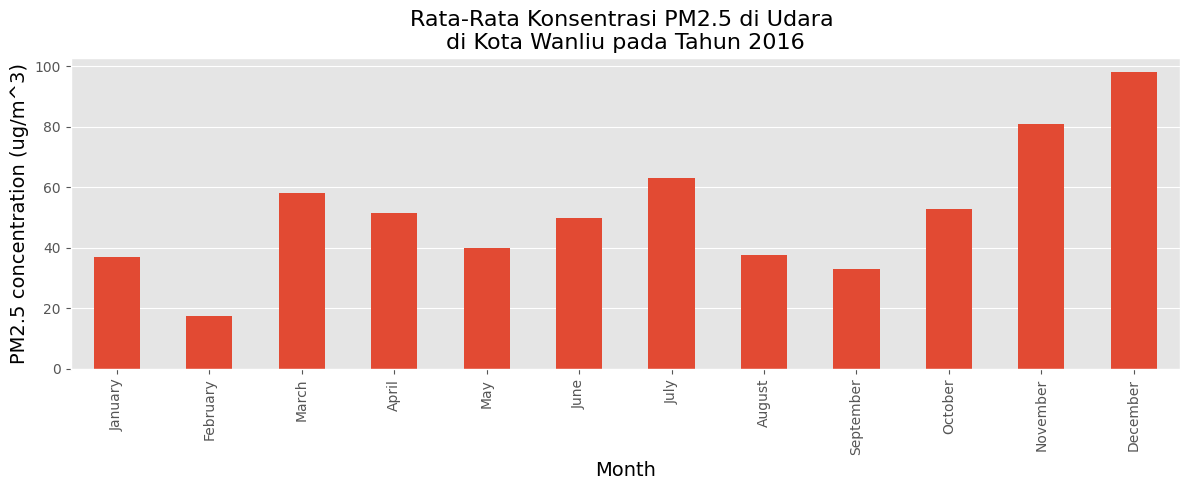

In [19]:
#mengambil data hanya di tahun 2016
prsa_wanliu_df['year'] = prsa_wanliu_df['year'].astype(int)
data_2016 = prsa_wanliu_df[prsa_wanliu_df['year'] == 2016]


monthly_data_2016 = data_2016[['month', 'PM2.5']]

months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

ordered_monthdf = pd.DataFrame(months,columns=['month'])

map_dict = {}
for i,j in enumerate(months):
    map_dict.setdefault(i+1,j)

monthly_data_2016.month = monthly_data_2016.month.map(map_dict)

monthly_average = monthly_data_2016.groupby('month').median()
monthly_average = pd.merge(ordered_monthdf,monthly_average,left_on='month',right_index=True)
monthly_average = np.round(monthly_average,1)
monthly_average = monthly_average.set_index('month')

# mem-plot data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Rata-Rata Konsentrasi PM2.5 di Udara \ndi Kota Wanliu pada Tahun 2016',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

### Pertanyaan 2: Di jam berapakah rata-rata jumlah PM2.5 di udara tinggi?

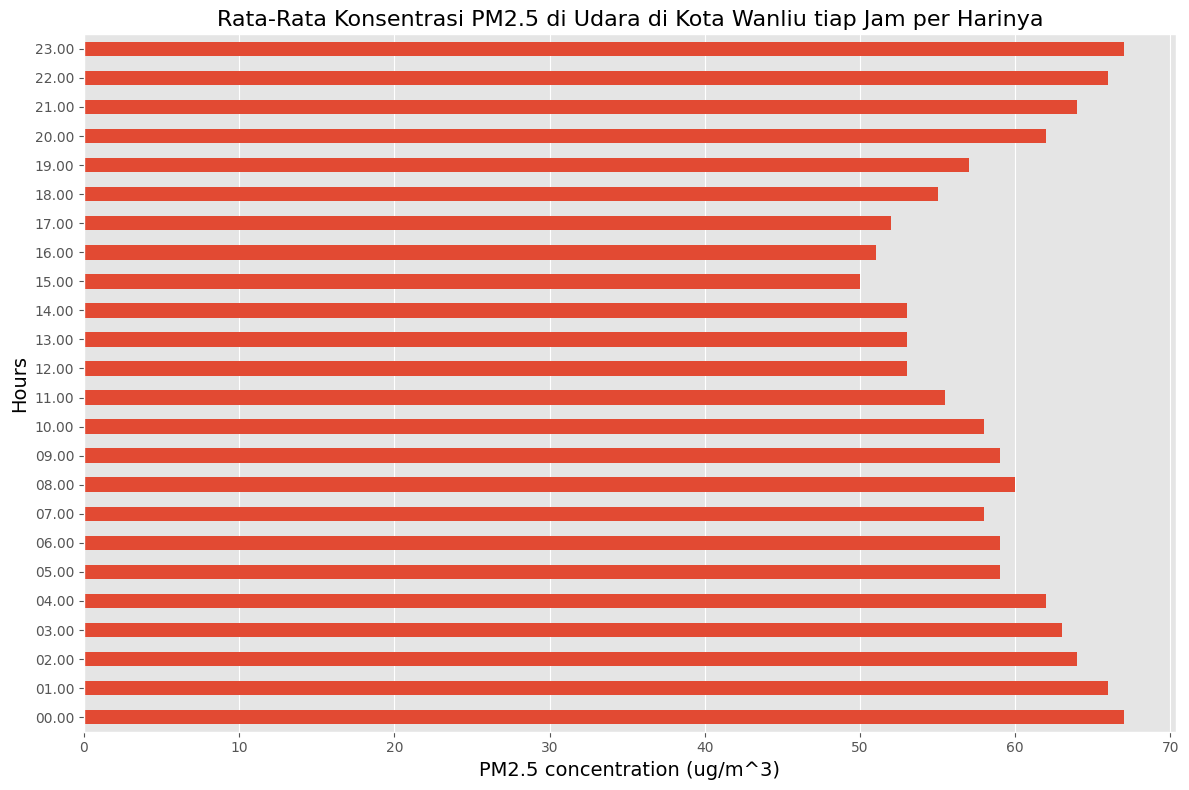

In [20]:
hourly_data = prsa_wanliu_df[['hour','PM2.5']]

hrs = ['00.00','01.00','02.00','03.00','04.00','05.00','06.00','07.00','08.00','09.00','10.00',
       '11.00','12.00','13.00','14.00','15.00','16.00','17.00','18.00','19.00',
       '20.00','21.00','22.00','23.00']

hour_dict = {}
for i,j in enumerate(hrs):
    hour_dict.setdefault(i,j)
    
hourly_data = hourly_data.groupby('hour').median().reset_index()
hourly_data.hour = hourly_data.hour.map(hour_dict)
hourly_data = hourly_data.set_index('hour')

# mem-plot data
with plt.style.context('ggplot'):
    hourly_data.plot(figsize=(12,8),legend=False,kind='barh',linewidth=.9)
    plt.ylabel('Hours',fontsize=14)
    plt.xlabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Rata-Rata Konsentrasi PM2.5 di Udara di Kota Wanliu tiap Jam per Harinya',fontsize=16)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

### Pertanyaan 3: Faktor apa saja yang mempengaruhi atau berkorelasi kuat dengan konsentrasi PM2.5?

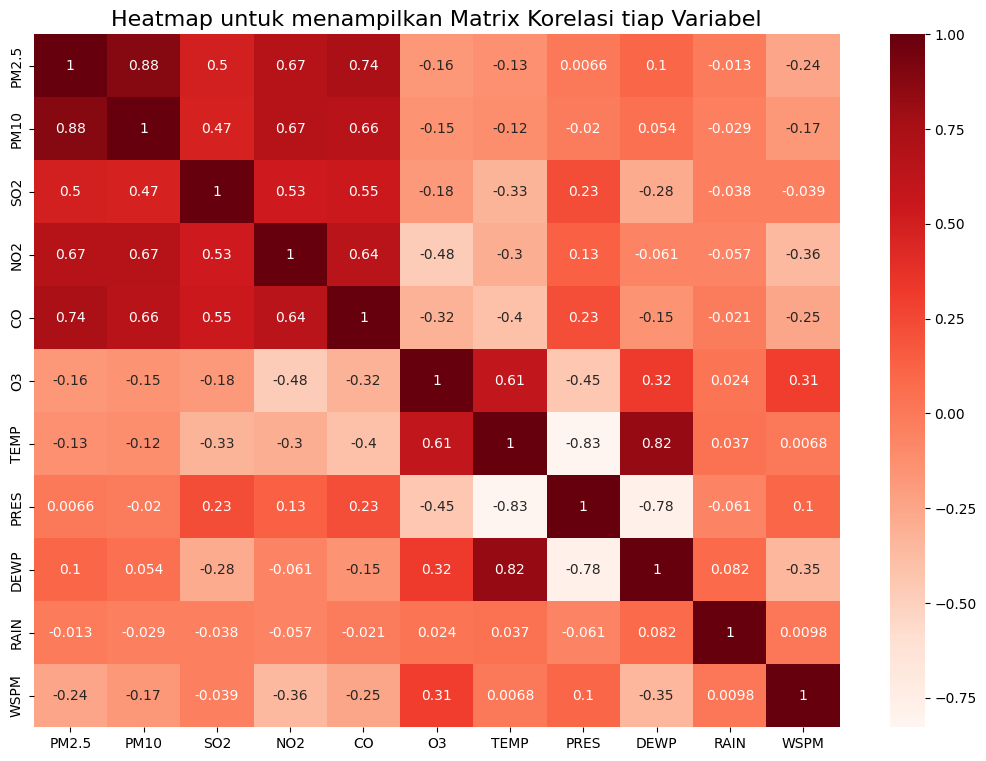

In [22]:
plt.figure(figsize=(13,9))

correlation_data = prsa_wanliu_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]

sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)

plt.title('Heatmap untuk menampilkan Matrix Korelasi tiap Variabel',fontsize=16)
plt.show()

**Insight:**
- Bar Chart pertama menunjukkan rata-rata konsentrasi PM2.5 di udara di Kota Wanliu dari bulan Januari hingga Desember tahun 2016, dengan konsentrasi tertinggi terjadi pada bulan Desember.
- Bar Chart kedua menunjukkan bahwa konsentrasi rata-rata PM2.5 di udara di Kota Wanliu cenderung tinggi pada tengah malam (sekitar pukul 23.00-01.00).
- Heatmap menunjukkan korelasi yang kuat antara PM2.5 dengan variabel-variabel seperti PM10, NO2, dan CO, yang berarti peningkatan konsentrasi polutan ini kemungkinan besar saling berkaitan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1: Konsentrasi PM2.5 di udara di Kota Wanliu mencapai nilai tertinggi pada bulan Desember di tahun 2016, dengan rata-rata bulanan mencapai 138.5 µg/m³.
- Conclusion pertanyaan 2: Konsentrasi PM2.5 di udara di Kota Wanliu cenderung tinggi pada jam-jam malam, dimulai dari pukul 23.00 hingga 01.00, dengan rata-rata berada di kisaran 85 µg/m³.
- Conclusion pertanyaan 3: Berdasarkan heatmap, PM2.5 memiliki korelasi tertinggi dengan PM10 (0.89), diikuti oleh korelasi dengan CO yang mencapai angka 0.78, menunjukkan adanya keterkaitan yang signifikan antara polutan ini.